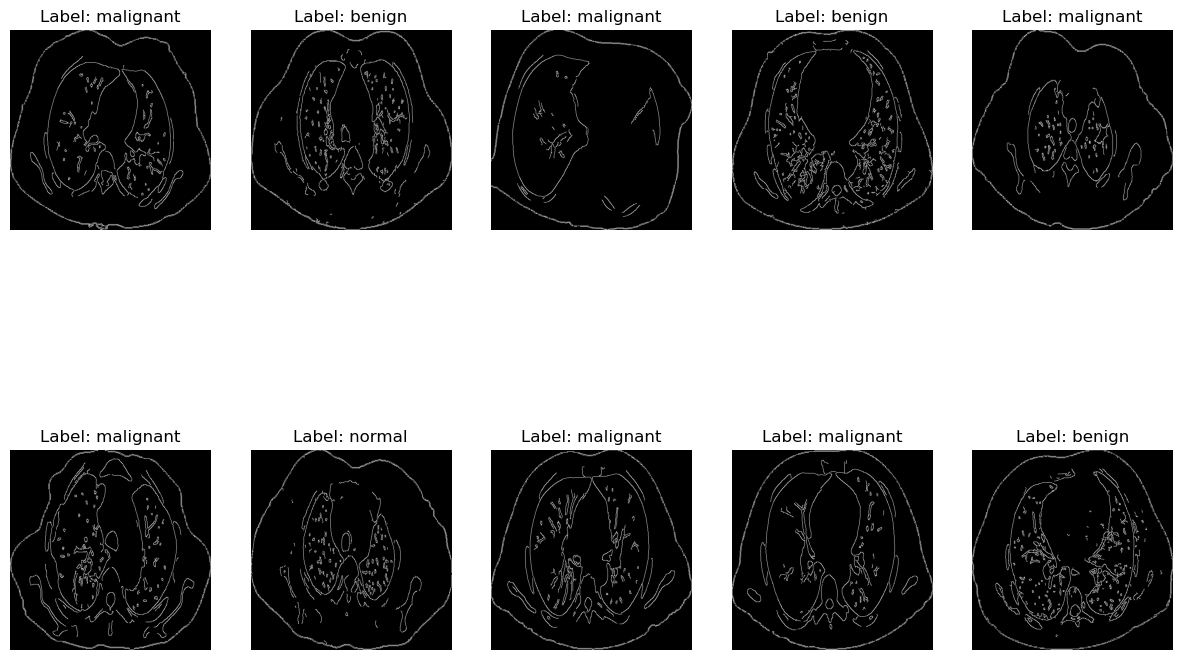

In [3]:
import os
import cv2
import pandas as pd
import matplotlib.pyplot as plt

# Function to load images from a folder structure into a DataFrame
def load_images_from_folder(base_folder):
    data = []
    
    # Loop over each class folder
    for label in os.listdir(base_folder):
        class_folder = os.path.join(base_folder, label)
        
        # Check if it's indeed a directory (to skip any non-folder files)
        if os.path.isdir(class_folder):
            # Loop over each image file in the class folder
            for filename in os.listdir(class_folder):
                file_path = os.path.join(class_folder, filename)
                
                # Read the image in grayscale mode
                image = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
                
                # Append the image and label to the data list
                if image is not None:
                    data.append({'image': image, 'label': label})
                else:
                    print(f"Warning: Could not read image {file_path}")

    # Create a DataFrame from the data list
    df = pd.DataFrame(data)
    return df

# Specify the base folder path where images are stored
base_folder = "../datasets/3_image/processed/3_ed_ub"  # Adjust path as needed

# Load images into a DataFrame
image_df = load_images_from_folder(base_folder)

# Display 10 random images from the loaded DataFrame
sample_images = image_df.sample(10, random_state=42)  # Set random_state for reproducibility
plt.figure(figsize=(15, 10))
for i, row in enumerate(sample_images.itertuples(), 1):
    plt.subplot(2, 5, i)
    plt.imshow(row.image, cmap='gray')
    plt.title(f"Label: {row.label}")
    plt.axis('off')
plt.show()